In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('encoded_features.csv')

df.head()

Saving encoded_features.csv to encoded_features.csv


,Smiles,pChEMBL Value,Node_Features,Edge_Features,Encoded_Node_Features,Encoded_Edge_Features,Num_Node_Features,Num_Edge_Features
0,COc1ccc2nccc([C@@H](O)CC[C@@H]3CCN(C4CC(c5cccc...,5.81,"[[6, 0, 3, rdkit.Chem.rdchem.HybridizationType...","[[1.0, False, False], [1.0, True, False], [1.5...","[[6, 0, 3, 0.0, 0.0, 1.0, 0], [8, 0, 0, 0.0, 1...","[[1.0, 0.0, 0.0, 0.0, 0, 0], [1.0, 0.0, 0.0, 0...",7,6
1,COc1ccc2nccc([C@@H](O)CC[C@@H]3CCN(C4CC(c5cccc...,5.81,"[[6, 0, 3, rdkit.Chem.rdchem.HybridizationType...","[[1.0, False, False], [1.0, True, False], [1.5...","[[6, 0, 3, 0.0, 0.0, 1.0, 0], [8, 0, 0, 0.0, 1...","[[1.0, 0.0, 0.0, 0.0, 0, 0], [1.0, 0.0, 0.0, 0...",7,6
2,O=C(O)CCCC(=O)Nc1ccc(-c2nc3cc(F)ccc3[nH]2)cc1,5.95,"[[8, 0, 0, rdkit.Chem.rdchem.HybridizationType...","[[2.0, True, False], [1.0, True, False], [1.0,...","[[8, 0, 0, 0.0, 1.0, 0.0, 0], [6, 0, 0, 0.0, 1...","[[0.0, 1.0, 0.0, 0.0, 1, 0], [1.0, 0.0, 0.0, 0...",7,6
3,CC(C)(C)c1ccc(CN2CCC(C(O)(c3ccccc3)c3ccccc3)CC...,4.05,"[[6, 0, 3, rdkit.Chem.rdchem.HybridizationType...","[[1.0, False, False], [1.0, False, False], [1....","[[6, 0, 3, 0.0, 0.0, 1.0, 0], [6, 0, 0, 0.0, 0...","[[1.0, 0.0, 0.0, 0.0, 0, 0], [1.0, 0.0, 0.0, 0...",7,6
4,CC(C)(C)c1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3cc...,4.03,"[[6, 0, 3, rdkit.Chem.rdchem.HybridizationType...","[[1.0, False, False], [1.0, False, False], [1....","[[6, 0, 3, 0.0, 0.0, 1.0, 0], [6, 0, 0, 0.0, 0...","[[1.0, 0.0, 0.0, 0.0, 0, 0], [1.0, 0.0, 0.0, 0...",7,6


In [ ]:
df_encoded_features = df

In [ ]:
print(df_encoded_features.columns)


Index(['Smiles', 'pChEMBL Value', 'Node_Features', 'Edge_Features',
       'Encoded_Node_Features', 'Encoded_Edge_Features', 'Num_Node_Features',
       'Num_Edge_Features'],
      dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df_encoded_features.columns

Index(['Smiles', 'pChEMBL Value', 'Node_Features', 'Edge_Features',
       'Encoded_Node_Features', 'Encoded_Edge_Features', 'Num_Node_Features',
       'Num_Edge_Features'],
      dtype='object')

In [ ]:
!pip install torch torchvision torchaudio
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.3 MB/s eta 0:00:00


In [ ]:
# Check the data types of all columns
print("Column Data Types:\n")
print(df_encoded_features.dtypes)

# Check specific columns for expected structure
print("\nSample Encoded Node Features (First Row):")
print(type(df_encoded_features['Encoded_Node_Features'][0]))

print("\nSample Encoded Edge Features (First Row):")
print(type(df_encoded_features['Encoded_Edge_Features'][0]))

# Validate the numerical columns
print("\nChecking Numerical Columns:")
print("pChEMBL Value Type:", type(df_encoded_features['pChEMBL Value'][0]))
print("Num_Node_Features Type:", type(df_encoded_features['Num_Node_Features'][0]))
print("Num_Edge_Features Type:", type(df_encoded_features['Num_Edge_Features'][0]))


Column Data Types:

Smiles                    object
pChEMBL Value            float64
Node_Features             object
Edge_Features             object
Encoded_Node_Features     object
Encoded_Edge_Features     object
Num_Node_Features          int64
Num_Edge_Features          int64
dtype: object

Sample Encoded Node Features (First Row):
<class 'str'>

Sample Encoded Edge Features (First Row):
<class 'str'>

Checking Numerical Columns:
pChEMBL Value Type: <class 'numpy.float64'>
Num_Node_Features Type: <class 'numpy.int64'>
Num_Edge_Features Type: <class 'numpy.int64'>


In [ ]:
import ast

# Convert Encoded_Node_Features from string to list
df_encoded_features['Encoded_Node_Features'] = df_encoded_features['Encoded_Node_Features'].apply(ast.literal_eval)

# Convert Encoded_Edge_Features from string to list
df_encoded_features['Encoded_Edge_Features'] = df_encoded_features['Encoded_Edge_Features'].apply(ast.literal_eval)

# Verify the conversion
print("Sample Encoded Node Features (First Row):", type(df_encoded_features['Encoded_Node_Features'][0]))
print("Sample Encoded Edge Features (First Row):", type(df_encoded_features['Encoded_Edge_Features'][0]))


Sample Encoded Node Features (First Row): <class 'list'>
Sample Encoded Edge Features (First Row): <class 'list'>


In [ ]:
# Check the data types of all columns
print("Column Data Types:\n")
print(df_encoded_features.dtypes)

# Check specific columns for expected structure
print("\nSample Encoded Node Features (First Row):")
print(type(df_encoded_features['Encoded_Node_Features'][0]))

print("\nSample Encoded Edge Features (First Row):")
print(type(df_encoded_features['Encoded_Edge_Features'][0]))

# Validate the numerical columns
print("\nChecking Numerical Columns:")
print("pChEMBL Value Type:", type(df_encoded_features['pChEMBL Value'][0]))
print("Num_Node_Features Type:", type(df_encoded_features['Num_Node_Features'][0]))
print("Num_Edge_Features Type:", type(df_encoded_features['Num_Edge_Features'][0]))

Column Data Types:

Smiles                    object
pChEMBL Value            float64
Node_Features             object
Edge_Features             object
Encoded_Node_Features     object
Encoded_Edge_Features     object
Num_Node_Features          int64
Num_Edge_Features          int64
dtype: object

Sample Encoded Node Features (First Row):
<class 'list'>

Sample Encoded Edge Features (First Row):
<class 'list'>

Checking Numerical Columns:
pChEMBL Value Type: <class 'numpy.float64'>
Num_Node_Features Type: <class 'numpy.int64'>
Num_Edge_Features Type: <class 'numpy.int64'>


In [ ]:
df_encoded_features.head()

,Smiles,pChEMBL Value,Node_Features,Edge_Features,Encoded_Node_Features,Encoded_Edge_Features,Num_Node_Features,Num_Edge_Features
0,COc1ccc2nccc([C@@H](O)CC[C@@H]3CCN(C4CC(c5cccc...,5.81,"[[6, 0, 3, rdkit.Chem.rdchem.HybridizationType...","[[1.0, False, False], [1.0, True, False], [1.5...","[[6, 0, 3, 0.0, 0.0, 1.0, 0], [8, 0, 0, 0.0, 1...","[[1.0, 0.0, 0.0, 0.0, 0, 0], [1.0, 0.0, 0.0, 0...",7,6
1,COc1ccc2nccc([C@@H](O)CC[C@@H]3CCN(C4CC(c5cccc...,5.81,"[[6, 0, 3, rdkit.Chem.rdchem.HybridizationType...","[[1.0, False, False], [1.0, True, False], [1.5...","[[6, 0, 3, 0.0, 0.0, 1.0, 0], [8, 0, 0, 0.0, 1...","[[1.0, 0.0, 0.0, 0.0, 0, 0], [1.0, 0.0, 0.0, 0...",7,6
2,O=C(O)CCCC(=O)Nc1ccc(-c2nc3cc(F)ccc3[nH]2)cc1,5.95,"[[8, 0, 0, rdkit.Chem.rdchem.HybridizationType...","[[2.0, True, False], [1.0, True, False], [1.0,...","[[8, 0, 0, 0.0, 1.0, 0.0, 0], [6, 0, 0, 0.0, 1...","[[0.0, 1.0, 0.0, 0.0, 1, 0], [1.0, 0.0, 0.0, 0...",7,6
3,CC(C)(C)c1ccc(CN2CCC(C(O)(c3ccccc3)c3ccccc3)CC...,4.05,"[[6, 0, 3, rdkit.Chem.rdchem.HybridizationType...","[[1.0, False, False], [1.0, False, False], [1....","[[6, 0, 3, 0.0, 0.0, 1.0, 0], [6, 0, 0, 0.0, 0...","[[1.0, 0.0, 0.0, 0.0, 0, 0], [1.0, 0.0, 0.0, 0...",7,6
4,CC(C)(C)c1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3cc...,4.03,"[[6, 0, 3, rdkit.Chem.rdchem.HybridizationType...","[[1.0, False, False], [1.0, False, False], [1....","[[6, 0, 3, 0.0, 0.0, 1.0, 0], [6, 0, 0, 0.0, 0...","[[1.0, 0.0, 0.0, 0.0, 0, 0], [1.0, 0.0, 0.0, 0...",7,6


In [ ]:
# Check the type of an entry in Encoded_Node_Features
print(type(df_encoded_features.loc[0, 'Encoded_Node_Features']))

# Check the type of an entry in Encoded_Edge_Features
print(type(df_encoded_features.loc[0, 'Encoded_Edge_Features']))


<class 'list'>
<class 'list'>


In [ ]:
 !pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 47.4 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem

In [ ]:


def get_edge_connectivity(smiles):
    """
    Extracts the edge connectivity (bonds) for a molecule given its SMILES string.
    Returns a list of tuples, where each tuple (i, j) represents a bond between nodes i and j.
    """
    molecule = Chem.MolFromSmiles(smiles)
    if molecule is None:
        return []  # Handle invalid SMILES
    edge_connectivity = []
    for bond in molecule.GetBonds():
        start_idx = bond.GetBeginAtomIdx()
        end_idx = bond.GetEndAtomIdx()
        edge_connectivity.append((start_idx, end_idx))
    return edge_connectivity

# Apply the function to the entire dataframe to generate the Edge_Connectivity column
df_encoded_features['Edge_Connectivity'] = df_encoded_features['Smiles'].apply(get_edge_connectivity)

# Verify the updated dataframe
print(df_encoded_features.head())

# Check the first molecule's edge connectivity
print("Edge Connectivity (First Row):", df_encoded_features.iloc[0]['Edge_Connectivity'])


                                              Smiles  pChEMBL Value  \
0  COc1ccc2nccc([C@@H](O)CC[C@@H]3CCN(C4CC(c5cccc...           5.81   
1  COc1ccc2nccc([C@@H](O)CC[C@@H]3CCN(C4CC(c5cccc...           5.81   
2      O=C(O)CCCC(=O)Nc1ccc(-c2nc3cc(F)ccc3[nH]2)cc1           5.95   
3  CC(C)(C)c1ccc(CN2CCC(C(O)(c3ccccc3)c3ccccc3)CC...           4.05   
4  CC(C)(C)c1ccc(C(=O)CCCN2CCC(C(O)(c3ccccc3)c3cc...           4.03   

                                       Node_Features  \
0  [[6, 0, 3, rdkit.Chem.rdchem.HybridizationType...   
1  [[6, 0, 3, rdkit.Chem.rdchem.HybridizationType...   
2  [[8, 0, 0, rdkit.Chem.rdchem.HybridizationType...   
3  [[6, 0, 3, rdkit.Chem.rdchem.HybridizationType...   
4  [[6, 0, 3, rdkit.Chem.rdchem.HybridizationType...   

                                       Edge_Features  \
0  [[1.0, False, False], [1.0, True, False], [1.5...   
1  [[1.0, False, False], [1.0, True, False], [1.5...   
2  [[2.0, True, False], [1.0, True, False], [1.0,...   
3  [[1.0, Fa

In [ ]:
print(df_encoded_features.columns)


Index(['Smiles', 'pChEMBL Value', 'Node_Features', 'Edge_Features',
       'Encoded_Node_Features', 'Encoded_Edge_Features', 'Num_Node_Features',
       'Num_Edge_Features', 'Edge_Connectivity'],
      dtype='object')


In [ ]:
print(df_encoded_features['Edge_Connectivity'].head())


0    [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6...
1    [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6...
2    [(0, 1), (1, 2), (1, 3), (3, 4), (4, 5), (5, 6...
3    [(0, 1), (1, 2), (1, 3), (1, 4), (4, 5), (5, 6...
4    [(0, 1), (1, 2), (1, 3), (1, 4), (4, 5), (5, 6...
Name: Edge_Connectivity, dtype: object


In [ ]:
print(df['Edge_Connectivity'])

0      [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6...
1      [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6...
2      [(0, 1), (1, 2), (1, 3), (3, 4), (4, 5), (5, 6...
3      [(0, 1), (1, 2), (1, 3), (1, 4), (4, 5), (5, 6...
4      [(0, 1), (1, 2), (1, 3), (1, 4), (4, 5), (5, 6...
                             ...                        
430    [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6...
431    [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6...
432    [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6...
433    [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6...
434    [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6...
Name: Edge_Connectivity, Length: 435, dtype: object


In [ ]:
df_encoded_features.to_csv('EdgeConnetivity_features.csv', index=False)

In [ ]:
# Extract the first row
first_row = df_encoded_features.iloc[0]

# Print details for verification
print("SMILES:", first_row['Smiles'])
print("Number of Nodes (Atoms):", first_row['Num_Node_Features'])
print("Edge Connectivity (First Row):", first_row['Edge_Connectivity'])


SMILES: COc1ccc2nccc([C@@H](O)CC[C@@H]3CCN(C4CC(c5ccccc5C(F)(F)F)C4)C[C@@H]3C(=O)O)c2c1
Number of Nodes (Atoms): 7
Edge Connectivity (First Row): [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (10, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (27, 29), (27, 30), (20, 31), (17, 32), (32, 33), (33, 34), (34, 35), (34, 36), (9, 37), (37, 38), (38, 2), (37, 5), (33, 14), (31, 18), (26, 21)]


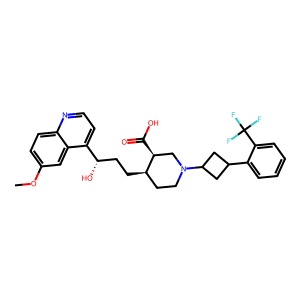

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

# Generate the molecule from the SMILES
molecule = Chem.MolFromSmiles(first_row['Smiles'])

# Draw the 2D structure
Draw.MolToImage(molecule)


In [ ]:
# Extract bond information from RDKit molecule
actual_edges = []
for bond in molecule.GetBonds():
    atom1 = bond.GetBeginAtomIdx()
    atom2 = bond.GetEndAtomIdx()
    actual_edges.append((atom1, atom2))

# Print the actual bonds
print("Actual Bonds:", actual_edges)

# Compare with Edge_Connectivity
print("Matches Edge_Connectivity:", set(first_row['Edge_Connectivity']) == set(actual_edges))


Actual Bonds: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (10, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (27, 29), (27, 30), (20, 31), (17, 32), (32, 33), (33, 34), (34, 35), (34, 36), (9, 37), (37, 38), (38, 2), (37, 5), (33, 14), (31, 18), (26, 21)]
Matches Edge_Connectivity: True


In [ ]:
# Step 1: Check column data types
print("Column Data Types:")
print(df_encoded_features.dtypes)

# Step 2: Inspect the first row of critical columns
print("\nSample Data Inspection:")
print("Sample Encoded Node Features (First Row):", type(df_encoded_features['Encoded_Node_Features'][0]))
print("Sample Edge Connectivity (First Row):", type(df_encoded_features['Edge_Connectivity'][0]))
print("Sample Encoded Edge Features (First Row):", type(df_encoded_features['Encoded_Edge_Features'][0]))
print("pChEMBL Value (First Row):", type(df_encoded_features['pChEMBL Value'][0]))

# Step 3: Ensure all rows are consistent
print("\nChecking Consistency...")
print("All Node Features as lists:", all(isinstance(item, list) for item in df_encoded_features['Encoded_Node_Features']))
print("All Edge Features as lists:", all(isinstance(item, list) for item in df_encoded_features['Encoded_Edge_Features']))
print("All Edge Connectivity as lists:", all(isinstance(item, list) for item in df_encoded_features['Edge_Connectivity']))
print("All pChEMBL Values as float:", all(isinstance(item, (float, int)) for item in df_encoded_features['pChEMBL Value']))


Column Data Types:
Smiles                    object
pChEMBL Value            float64
Node_Features             object
Edge_Features             object
Encoded_Node_Features     object
Encoded_Edge_Features     object
Num_Node_Features          int64
Num_Edge_Features          int64
Edge_Connectivity         object
dtype: object

Sample Data Inspection:
Sample Encoded Node Features (First Row): <class 'list'>
Sample Edge Connectivity (First Row): <class 'list'>
Sample Encoded Edge Features (First Row): <class 'list'>
pChEMBL Value (First Row): <class 'numpy.float64'>

Checking Consistency...
All Node Features as lists: True
All Edge Features as lists: True
All Edge Connectivity as lists: True
All pChEMBL Values as float: True


In [ ]:
import torch
from torch_geometric.data import Data

# Step 1: Define a function to convert a row into a PyG Data object
def row_to_pyg_data(row):
    # Convert features and connectivity to tensors
    node_features = torch.tensor(row['Encoded_Node_Features'], dtype=torch.float)
    edge_index = torch.tensor(row['Edge_Connectivity'], dtype=torch.long).t().contiguous()
    edge_features = torch.tensor(row['Encoded_Edge_Features'], dtype=torch.float)
    target = torch.tensor([row['pChEMBL Value']], dtype=torch.float)

    # Create and return the PyG Data object
    return Data(x=node_features, edge_index=edge_index, edge_attr=edge_features, y=target)

# Step 2: Convert the entire dataframe
pyg_data_list = []
for _, row in df_encoded_features.iterrows():
    pyg_data_list.append(row_to_pyg_data(row))

# Step 3: Verify the dataset
print(f"Number of graphs in the dataset: {len(pyg_data_list)}")
print(f"Example graph:\n{pyg_data_list[0]}")


Number of graphs in the dataset: 435
Example graph:
Data(x=[39, 7], edge_index=[2, 43], edge_attr=[43, 6], y=[1])


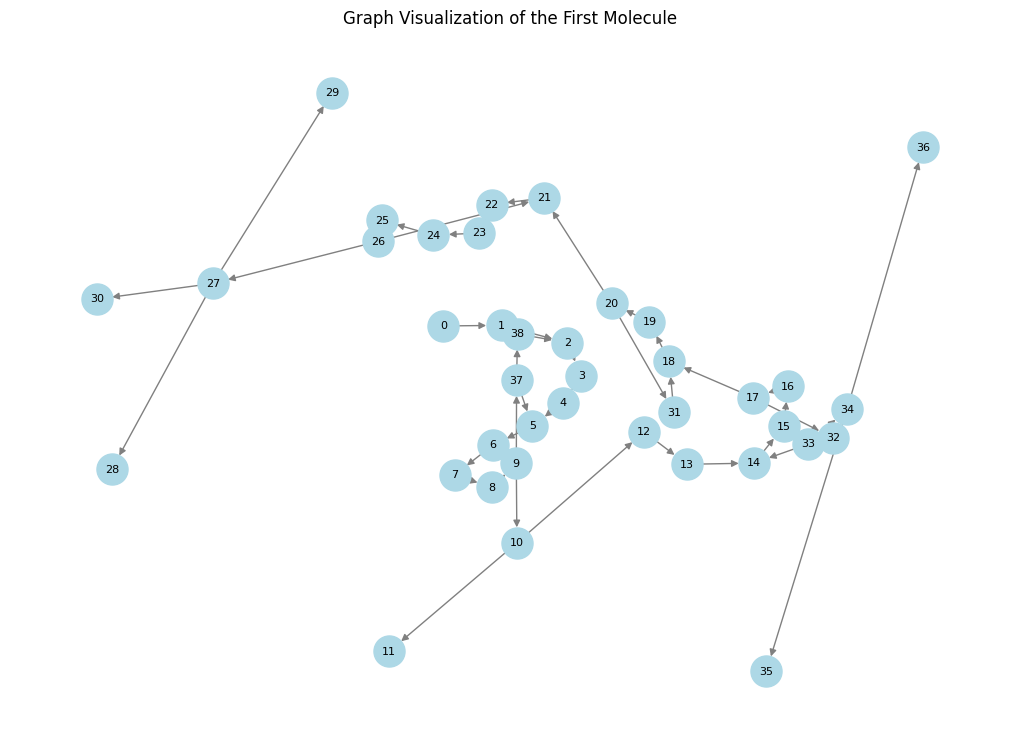

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

# Convert the first graph in pyg_data_list to a NetworkX graph
graph = pyg_data_list[0]  # First graph from the PyTorch Geometric dataset
nx_graph = to_networkx(graph, edge_attrs=["edge_attr"], node_attrs=["x"])

# Plot the graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(nx_graph)  # Spring layout for better visual separation

# Draw the graph
nx.draw(
    nx_graph, pos,
    with_labels=True,
    node_color="lightblue",
    node_size=500,
    edge_color="gray",
    font_size=8
)

plt.title("Graph Visualization of the First Molecule")
plt.show()


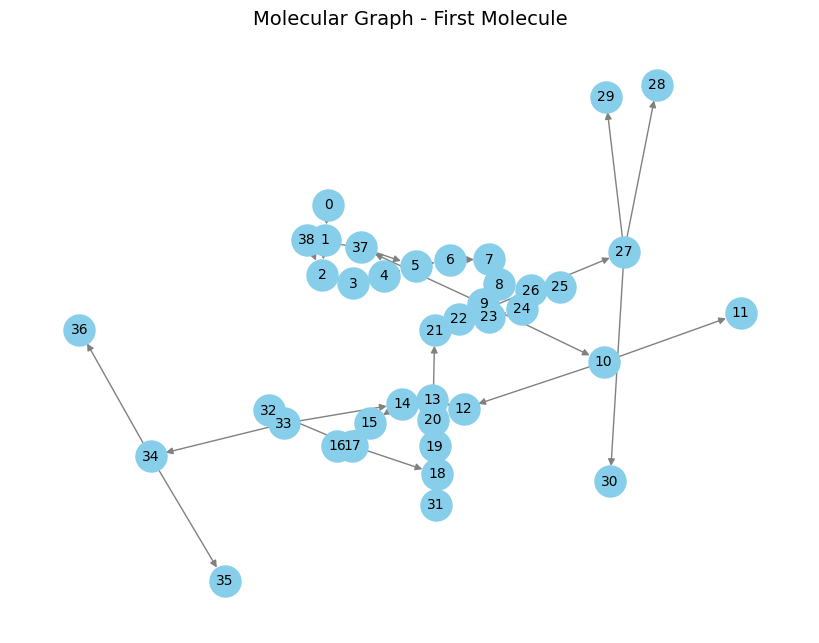

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

# Convert the first molecule's graph to a NetworkX graph for visualization
graph = pyg_data_list[0]  # First graph from the dataset
nx_graph = to_networkx(graph, edge_attrs=["edge_attr"], node_attrs=["x"])

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(nx_graph)  # Spring layout for better spacing

# Draw the graph
nx.draw(nx_graph, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray", font_size=10)
plt.title("Molecular Graph - First Molecule", fontsize=14)

# Show the plot
plt.show()


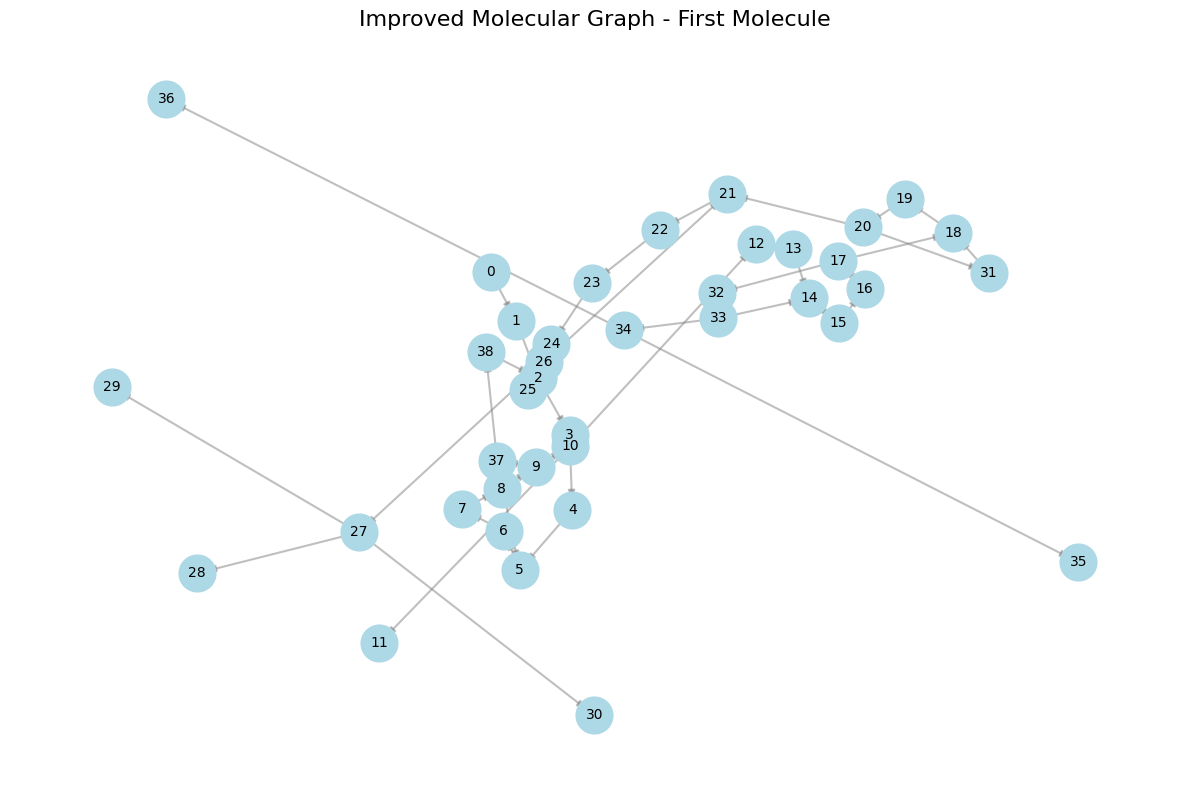

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

# Convert the first molecule's graph to a NetworkX graph for visualization
graph = pyg_data_list[0]  # First graph from the dataset
nx_graph = to_networkx(graph, edge_attrs=["edge_attr"], node_attrs=["x"])

# Plot the graph
plt.figure(figsize=(12, 8))

# Use a circular layout for better clarity
pos = nx.spring_layout(nx_graph, seed=42)  # Better spacing

# Draw nodes with a custom size and color
nx.draw_networkx_nodes(nx_graph, pos, node_size=700, node_color="lightblue")

# Draw edges with transparency for better visibility
nx.draw_networkx_edges(nx_graph, pos, alpha=0.5, edge_color="gray", width=1.5)

# Draw labels for the nodes
nx.draw_networkx_labels(nx_graph, pos, font_size=10, font_color="black")

# Add a title
plt.title("Improved Molecular Graph - First Molecule", fontsize=16)

# Show the plot
plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# 1. Check number of graphs
print(f"Number of graphs in the dataset: {len(pyg_data_list)}")

# 2. Check for missing or null values in the dataframe
print("Checking for missing values in columns:")
print(df_encoded_features.isnull().sum())

# 3. Verify node and edge features consistency
node_features_lengths = [data.x.shape[0] for data in pyg_data_list]
edge_features_lengths = [data.edge_attr.shape[0] for data in pyg_data_list]
edge_indices_lengths = [data.edge_index.shape[1] for data in pyg_data_list]

print(f"Number of graphs: {len(pyg_data_list)}")
print(f"Average number of nodes: {np.mean(node_features_lengths):.2f}")
print(f"Average number of edges: {np.mean(edge_indices_lengths):.2f}")

# 4. Ensure node and edge feature lengths match
node_edge_feature_mismatch = [
    i for i, (n, e) in enumerate(zip(node_features_lengths, edge_features_lengths))
    if n != e
]
print(f"Graphs with mismatched node and edge features: {len(node_edge_feature_mismatch)}")

# 5. Check target value (pChEMBL Value) distribution
pchembl_values = [data.y.item() for data in pyg_data_list]
print(f"pChEMBL Value - Min: {min(pchembl_values)}, Max: {max(pchembl_values)}")
print(f"pChEMBL Value - Mean: {np.mean(pchembl_values):.2f}, Std: {np.std(pchembl_values):.2f}")


Number of graphs in the dataset: 435
Checking for missing values in columns:
Smiles                   0
pChEMBL Value            0
Node_Features            0
Edge_Features            0
Encoded_Node_Features    0
Encoded_Edge_Features    0
Num_Node_Features        0
Num_Edge_Features        0
Edge_Connectivity        0
dtype: int64
Number of graphs: 435
Average number of nodes: 32.14
Average number of edges: 35.35
Graphs with mismatched node and edge features: 435
pChEMBL Value - Min: 4.0, Max: 9.1899995803833
pChEMBL Value - Mean: 6.18, Std: 1.24


In [ ]:
edge_mismatch = [
    i for i, data in enumerate(pyg_data_list)
    if data.edge_index.shape[1] != data.edge_attr.shape[0]
]
print(f"Graphs with mismatched edge_index and edge_attr: {len(edge_mismatch)}")


Graphs with mismatched edge_index and edge_attr: 0


In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Define split ratios
train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

# Step 2: Split the dataset into training and temp (validation + test)
train_data, temp_data = train_test_split(pyg_data_list, test_size=(1 - train_ratio), random_state=42)

# Step 3: Further split temp_data into validation and test sets
valid_data, test_data = train_test_split(temp_data, test_size=(test_ratio / (valid_ratio + test_ratio)), random_state=42)

# Step 4: Verify the splits
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(valid_data)}")
print(f"Test set size: {len(test_data)}")


Training set size: 304
Validation set size: 65
Test set size: 66


In [ ]:
from torch_geometric.loader import DataLoader

# Step 1: Create DataLoaders for each dataset
batch_size = 32  # You can tune this value depending on your hardware

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Step 2: Verify DataLoader setup
print(f"Number of batches in Training set: {len(train_loader)}")
print(f"Number of batches in Validation set: {len(valid_loader)}")
print(f"Number of batches in Test set: {len(test_loader)}")


Number of batches in Training set: 10
Number of batches in Validation set: 3
Number of batches in Test set: 3


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool

class GNNModel(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()

        # Graph Convolutional Layers
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)

        # Global Pooling Layer
        self.global_pool = global_mean_pool

        # Fully Connected Layers for regression
        self.fc1 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.fc2 = torch.nn.Linear(hidden_dim, output_dim)

    def forward(self, data):
        """
        Forward pass through the model.

        Arguments:
        data: A batch of PyG Data objects containing:
              - x: Node features
              - edge_index: Graph connectivity
              - edge_attr: Edge features (optional here, not used in GCN)
              - batch: Batch index for global pooling

        Returns:
        Regression output for each graph.
        """
        # Unpack graph components
        x, edge_index, edge_attr, batch = data.x, data.edge_index, data.edge_attr, data.batch

        # GCN Layers
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))

        # Global Mean Pooling to get graph-level features
        x = self.global_pool(x, batch)

        # Fully Connected Layers for regression
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x


In [ ]:
# Define model parameters
input_dim = df_encoded_features['Encoded_Node_Features'][0][0].__len__()  # Number of node features
hidden_dim = 64  # Tuneable hyperparameter
output_dim = 1  # Single regression target (pChEMBL)

# Initialize the model
model = GNNModel(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)
print("Model Architecture:")
print(model)

# Verify model with a sample batch
sample_batch = next(iter(train_loader))
output = model(sample_batch)
print(f"Sample Output Shape: {output.shape}")


Model Architecture:
GNNModel(
  (conv1): GCNConv(7, 64)
  (conv2): GCNConv(64, 64)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)
Sample Output Shape: torch.Size([32, 1])


In [ ]:
import torch.optim as optim

# Define loss function and optimizer
loss_fn = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Loss function and optimizer initialized.")


Loss function and optimizer initialized.


In [ ]:
# Define dimensions
input_dim = pyg_data_list[0].x.shape[1]  # Number of node features
hidden_dim = 64  # You can tune this value
output_dim = 1  # Regression output (pChEMBL Value)

# Instantiate the model
model = GNNModel(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Test the model with a sample batch
sample_batch = next(iter(train_loader)).to(device)  # Move data to the same device
output = model(sample_batch)

print(f"Model Architecture:\n{model}")
print(f"Sample Output Shape: {output.shape}")


Model Architecture:
GNNModel(
  (conv1): GCNConv(7, 64)
  (conv2): GCNConv(64, 64)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)
Sample Output Shape: torch.Size([32, 1])


In [ ]:
import torch
import torch.nn.functional as F
from torch.optim import Adam

# Hyperparameters
num_epochs = 50
learning_rate = 0.001

# Loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = Adam(model.parameters(), lr=learning_rate)

# Move model to device
model = model.to(device)

# Training loop
for epoch in range(1, num_epochs + 1):
    model.train()  # Set model to training mode
    train_loss = 0

    for batch in train_loader:
        batch = batch.to(device)  # Move batch to device

        optimizer.zero_grad()  # Reset gradients
        out = model(batch)  # Forward pass
        loss = criterion(out, batch.y)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        train_loss += loss.item()  # Accumulate loss

    train_loss /= len(train_loader)  # Average loss for the epoch

    # Validation loop
    model.eval()  # Set model to evaluation mode
    val_loss = 0
    with torch.no_grad():
        for batch in valid_loader:
            batch = batch.to(device)
            out = model(batch)
            loss = criterion(out, batch.y)
            val_loss += loss.item()

    val_loss /= len(valid_loader)  # Average validation loss

    # Log progress
    print(f"Epoch {epoch}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, t

Epoch 1/50, Train Loss: 34.0307, Validation Loss: 25.5690
Epoch 2/50, Train Loss: 23.1535, Validation Loss: 13.5283
Epoch 3/50, Train Loss: 9.7500, Validation Loss: 2.0304
Epoch 4/50, Train Loss: 2.0957, Validation Loss: 2.9262
Epoch 5/50, Train Loss: 2.6648, Validation Loss: 1.1760
Epoch 6/50, Train Loss: 1.7330, Validation Loss: 0.9673
Epoch 7/50, Train Loss: 1.7585, Validation Loss: 0.9414
Epoch 8/50, Train Loss: 1.6479, Validation Loss: 1.0684
Epoch 9/50, Train Loss: 1.6091, Validation Loss: 0.9355
Epoch 10/50, Train Loss: 1.6544, Validation Loss: 0.9689
Epoch 11/50, Train Loss: 1.6536, Validation Loss: 0.9680
Epoch 12/50, Train Loss: 1.6372, Validation Loss: 1.0097
Epoch 13/50, Train Loss: 1.6247, Validation Loss: 0.9461
Epoch 14/50, Train Loss: 1.6322, Validation Loss: 0.9597
Epoch 15/50, Train Loss: 1.6416, Validation Loss: 0.9908
Epoch 16/50, Train Loss: 1.6076, Validation Loss: 0.9568
Epoch 17/50, Train Loss: 1.6560, Validation Loss: 0.9361
Epoch 18/50, Train Loss: 1.6069, Val

In [ ]:
torch.save(model.state_dict(), "gnn_model.pth")


Mean Squared Error (MSE): 1.6423
Root Mean Squared Error (RMSE): 1.2815
Mean Absolute Error (MAE): 1.0928
R-squared (R²): -0.0051


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


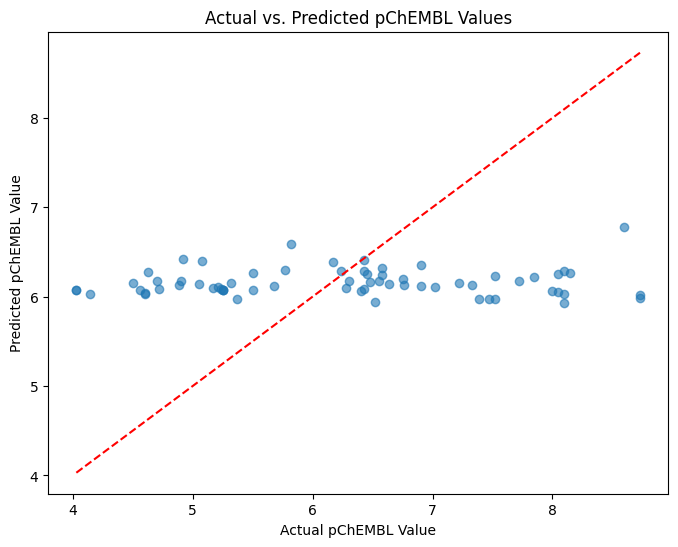

In [ ]:
import torch
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def evaluate_model(model, loader):
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for batch in loader:
            batch.to(device)  # Move batch to device
            preds = model(batch).view(-1).cpu().numpy()  # Predictions
            targets = batch.y.cpu().numpy()  # Actual targets
            all_preds.extend(preds)
            all_targets.extend(targets)

    # Compute metrics
    mse = mean_squared_error(all_targets, all_preds)
    rmse = mean_squared_error(all_targets, all_preds, squared=False)
    mae = mean_absolute_error(all_targets, all_preds)
    r2 = r2_score(all_targets, all_preds)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R²): {r2:.4f}")

    return all_preds, all_targets

# Evaluate the model on the test set
test_preds, test_targets = evaluate_model(model, test_loader)

# Visualize predictions
plt.figure(figsize=(8, 6))
plt.scatter(test_targets, test_preds, alpha=0.6)
plt.plot([min(test_targets), max(test_targets)], [min(test_targets), max(test_targets)], color='red', linestyle='--')
plt.xlabel("Actual pChEMBL Value")
plt.ylabel("Predicted pChEMBL Value")
plt.title("Actual vs. Predicted pChEMBL Values")
plt.show()


In [ ]:
import torch

# Function to extract graph embeddings
def extract_graph_embeddings(model, loader, device='cpu'):
    model.eval()
    embeddings = []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            # Get graph-level embeddings
            graph_embeddings = model(batch)
            embeddings.append(graph_embeddings.cpu())
    return torch.cat(embeddings, dim=0)

# Extract embeddings from the training dataset
train_embeddings = extract_graph_embeddings(model, train_loader)
print("Train embeddings shape:", train_embeddings.shape)


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat2 in method wrapper_CUDA_mm)

In [ ]:
# Add random noise to the embeddings
def sample_latent_space(embeddings, num_samples=10, noise_scale=0.1):
    noise = torch.randn((num_samples, embeddings.size(1))) * noise_scale
    sampled_embeddings = embeddings[:num_samples] + noise
    return sampled_embeddings

# Generate new samples
new_embeddings = sample_latent_space(train_embeddings, num_samples=5)
print("Sampled embeddings shape:", new_embeddings.shape)


NameError: name 'train_embeddings' is not defined

In [ ]:
class GraphDecoder(torch.nn.Module):
    def __init__(self, embedding_dim, node_feature_dim, edge_feature_dim, max_nodes):
        super(GraphDecoder, self).__init__()
        self.fc1 = torch.nn.Linear(embedding_dim, 128)
        self.fc2 = torch.nn.Linear(128, max_nodes * node_feature_dim)
        self.fc3 = torch.nn.Linear(128, max_nodes * max_nodes * edge_feature_dim)

        self.max_nodes = max_nodes
        self.node_feature_dim = node_feature_dim
        self.edge_feature_dim = edge_feature_dim

    def forward(self, embedding):
        x = torch.relu(self.fc1(embedding))

        # Node features
        node_features = self.fc2(x).view(-1, self.max_nodes, self.node_feature_dim)

        # Edge features
        edge_features = self.fc3(x).view(-1, self.max_nodes, self.max_nodes, self.edge_feature_dim)

        return node_features, edge_features

# Initialize the decoder
decoder = GraphDecoder(
    embedding_dim=train_embeddings.size(1),
    node_feature_dim=df_encoded_features['Num_Node_Features'].max(),
    edge_feature_dim=df_encoded_features['Num_Edge_Features'].max(),
    max_nodes=40  # Set based on your dataset
)

# Decode a sampled embedding
sampled_nodes, sampled_edges = decoder(new_embeddings[0])
print("Decoded node features:", sampled_nodes.shape)
print("Decoded edge features:", sampled_edges.shape)


NameError: name 'train_embeddings' is not defined